# HEART ATTACK PREDICTION

### PREPROCESSING DATA

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!pip install qiskit
!pip install qiskit-machine-learning
!pip install qiskit-aer
!pip install qiskit-algorithms
from IPython import display
display.clear_output()

In [3]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import joblib

#for ml
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#for dl
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

#for qml
from qiskit_aer import Aer
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.optimizers import COBYLA

In [5]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.shape

(1025, 14)

In [7]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
#check presence of null values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [14]:
X = df.drop("target",axis=1)
y = df["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [15]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
joblib.dump(scaler, "scaler.pkl")
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

### USING ML

In [ ]:
#using KNN
knn_classifier = KNeighborsClassifier(n_neighbors=1, metric="euclidean", p=2)

In [ ]:
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [ ]:
joblib.dump(knn_classifier, "knn_model.pkl")
knn_classifier = joblib.load("knn_model.pkl")
y_pred = knn_classifier.predict(X_test)

In [ ]:

cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)

cr = classification_report(y_test,y_pred)
print("Classification Report: ")
print(cr)

acc = accuracy_score(y_test,y_pred)
print("Accuracy: ",acc)

Confusion Matrix: 
[[ 98   0]
 [  0 107]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        98
         1.0       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy:  1.0


In [ ]:
test_errors = []

for i in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors=i, metric="euclidean", p=2)
    knn_classifier.fit(X_train,y_train)
    y_pred = knn_classifier.predict(X_test)
    test_errors.append(np.mean(y_pred != y_test))

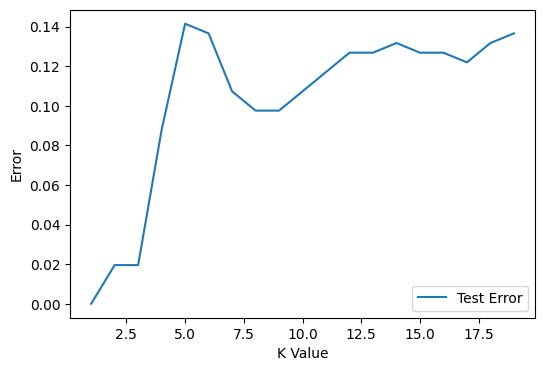

In [ ]:
plt.figure(figsize=(6,4), dpi =100)
plt.plot(range(1,20),test_errors,label='Test Error')
plt.legend()
plt.xlabel('K Value')
plt.ylabel('Error')
plt.show()

### USING DL

In [ ]:
dl_model = Sequential()
dl_model.add(Dense(500, input_dim=13, activation='relu'))
dl_model.add(Dense(100, activation='relu'))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compiling the model
dl_model.compile(optimizer='adam',
         loss='binary_crossentropy',
         metrics=['accuracy'])

dl_model.fit(X_train, y_train, epochs=100)
joblib.dump(dl_model, "dl_model.pkl")

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7435 - loss: 0.6008
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8447 - loss: 0.3943
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8645 - loss: 0.3575
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8289 - loss: 0.3659
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8807 - loss: 0.2980
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8904 - loss: 0.2798
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8883 - loss: 0.2798
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8856 - loss: 0.2774
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9045 - loss: 0.2235
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9262 - loss: 0.1970
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9255 - loss: 0.1947
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

['dl_model.pkl']

In [ ]:
dl_model = joblib.load("dl_model.pkl")
y_pred_dl = dl_model.predict(X_test)
y_pred_dl = (y_pred_dl > 0.5) #converting into binary 1 and 0


cm = confusion_matrix(y_test,y_pred_dl)
print("Confusion Matrix: ")
print(cm)

cr = classification_report(y_test,y_pred_dl)
print("Classification Report: ")
print(cr)

acc = accuracy_score(y_test,y_pred_dl)
print("Accuracy: ",acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
Confusion Matrix: 
[[ 98   0]
 [  0 107]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        98
         1.0       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy:  1.0


### USING QML

In [ ]:
#defining the feature map and ansatz

feature_dim = X_train.shape[1]

input_params = ParameterVector("x",feature_dim)
weight_params = ParameterVector("w",
                                RealAmplitudes(feature_dim, reps=1,entanglement='linear').num_parameters)

In [ ]:
qc = QuantumCircuit(feature_dim)
for i in range(feature_dim):
    qc.ry(input_params[i],i)
qc.compose(RealAmplitudes(feature_dim, reps=1, entanglement='linear').assign_parameters(weight_params),inplace=True)

In [ ]:
#define the Quantum Neural Network (qnn)
qnn = EstimatorQNN(
    circuit=qc,
    input_params=input_params,
    weight_params=weight_params,
)

<ipython-input-26-7767aa163fd3>:2: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(


In [ ]:
qml_classifer = NeuralNetworkClassifier(
    neural_network = qnn,
    optimizer = COBYLA(maxiter=100)
)

In [ ]:
qml_classifer.fit(X_train,y_train)
joblib.dump(qml_classifer, "qml_model.pkl")

['qml_model.pkl']

In [ ]:
qml_classifer = joblib.load("qml_model.pkl")
y_pred_qml = qml_classifer.predict(X_test)

cm = confusion_matrix(y_test,y_pred_qml)
print("Confusion Matrix: ")
print(cm)

cr = classification_report(y_test,y_pred_qml)
print("Classification Report: ")
print(cr)

acc = accuracy_score(y_test,y_pred_qml)
print("Accuracy: ",acc)


Confusion Matrix: 
[[  0  98]
 [  0 107]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        98
         1.0       0.52      1.00      0.69       107

    accuracy                           0.52       205
   macro avg       0.26      0.50      0.34       205
weighted avg       0.27      0.52      0.36       205

Accuracy:  0.5219512195121951


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
